In [2]:
from xtquant import xtdata
import matplotlib.pyplot as plt
import akshare as ak
import numpy as np
from datetime import datetime
import time
import tushare as ts
import pandas as pd

***<font color=steel
    size=5
       face=雅黑>
<mark>沪深成交量</mark>
</font>***

In [4]:
for sector in xtdata.get_stock_list_in_sector('沪深指数'):
    detail = xtdata.get_instrument_detail(sector)
    name = detail['InstrumentName']
    if name in ['上证指数', '深证成指']:
        print(sector)
    if '沪深300' in name:
        print(sector, name)


***** xtdata连接成功 *****
服务信息: {'tag': 'sp3', 'version': '1.0'}
服务地址: 127.0.0.1:58610
数据路径: D:\国金QMT交易端模拟\bin.x64/../userdata_mini/datadir
设置xtdata.enable_hello = False可隐藏此消息

000300.SH 沪深300
000001.SH
399001.SZ
399300.SZ 沪深300


In [5]:
def get_index_data(xt_sector_index, st, et, cnt, ped):
    # 订阅合约数据
    xtdata.subscribe_quote(xt_sector_index, period=ped, start_time=st, end_time=et, count=cnt, callback=None)
    # 下载指定合约历史行情
    xtdata.download_history_data(stock_code=xt_sector_index, period=ped)
    # 获取指定合约历史行情
    day_data = xtdata.get_market_data_ex(field_list=[], stock_list=[xt_sector_index], period=ped, 
                                         start_time=st, end_time=et)
    #print(day_data)
    return day_data[xt_sector_index]

In [6]:
st = '20250101'
#et = '20241217'
et = datetime.now().strftime('%Y%m%d')
#et = '20241217'
print(st, et)
cnt = 100
ped = '1d'

sh_mkt_data = get_index_data('000001.SH', st, et, cnt, ped)
sz_mkt_data = get_index_data('399001.SZ', st, et, cnt, ped)

20250101 20251207


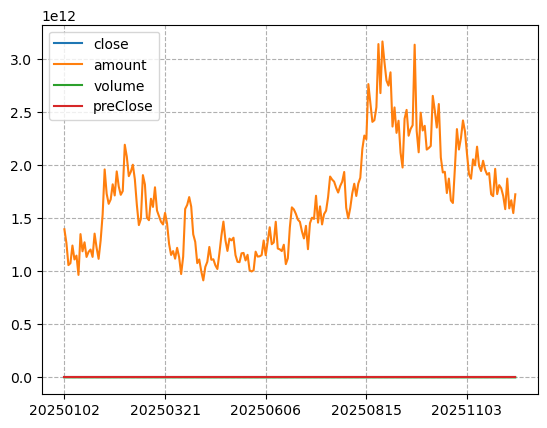

In [7]:
total_mkt_data = sz_mkt_data[['close', 'amount', 'volume', 'preClose']] + sh_mkt_data[['close', 'amount', 'volume', 'preClose']]
total_mkt_data.plot()
plt.grid(ls='--')

In [8]:
total_mkt_data.tail(10)

,close,amount,volume,preClose
20251124,16421.850,1.727774e+12,1194555010,16372.962
20251125,16647.336,1.812147e+12,1178569642,16421.849
20251126,16772.017,1.783346e+12,1144323533,16647.335
20251127,16750.454,1.709794e+12,1081580324,16772.018
20251128,16872.677,1.585796e+12,1061323042,16750.454
20251201,17060.723,1.873938e+12,1231994897,16872.678
20251202,16954.413,1.593430e+12,1099435620,17060.723
20251203,16833.253,1.669962e+12,1177323317,16954.413
20251204,16882.510,1.548960e+12,1079238374,16833.252
20251205,17050.485,1.725771e+12,1169671833,16882.511


In [9]:
total_mkt_data['year'] = total_mkt_data.index.to_series().apply(lambda x: x[:4])
total_mkt_data['month'] = total_mkt_data.index.to_series().apply(lambda x: x[4:6])
total_mkt_data[total_mkt_data.index >= '20230901'].groupby(['year', 'month'])['amount'].mean()
total_mkt_data[total_mkt_data.index >= '20240901']
sh_mkt_data[sh_mkt_data.index >= '20240901']
#sz_mkt_data[sz_mkt_data.index >= '20240901']

,time,open,high,low,close,volume,amount,settelementPrice,openInterest,preClose,suspendFlag
20250102,1735747200000,3347.940,3351.722,3242.087,3262.561,561375199,6.033405e+11,0.0,0,3351.763,0
20250103,1735833600000,3267.077,3273.566,3205.776,3211.430,517592014,5.231598e+11,0.0,0,3262.561,0
20250106,1736092800000,3209.783,3219.488,3185.463,3206.923,430978403,4.441882e+11,0.0,0,3211.430,0
20250107,1736179200000,3203.307,3230.853,3190.461,3229.644,409660529,4.363884e+11,0.0,0,3206.923,0
20250108,1736265600000,3218.858,3246.291,3175.725,3230.168,472864390,5.081484e+11,0.0,0,3229.644,0
...,...,...,...,...,...,...,...,...,...,...,...
20251201,1764518400000,3894.214,3914.465,3890.949,3914.007,537554133,7.856583e+11,0.0,0,3888.597,0
20251202,1764604800000,3908.456,3908.769,3888.328,3897.712,455584494,6.274407e+11,0.0,0,3914.007,0
20251203,1764691200000,3894.156,3901.696,3869.953,3878.000,485617270,6.471665e+11,0.0,0,3897.712,0
20251204,1764777600000,3879.742,3888.859,3859.049,3875.793,445040290,6.237126e+11,0.0,0,3877.999,0


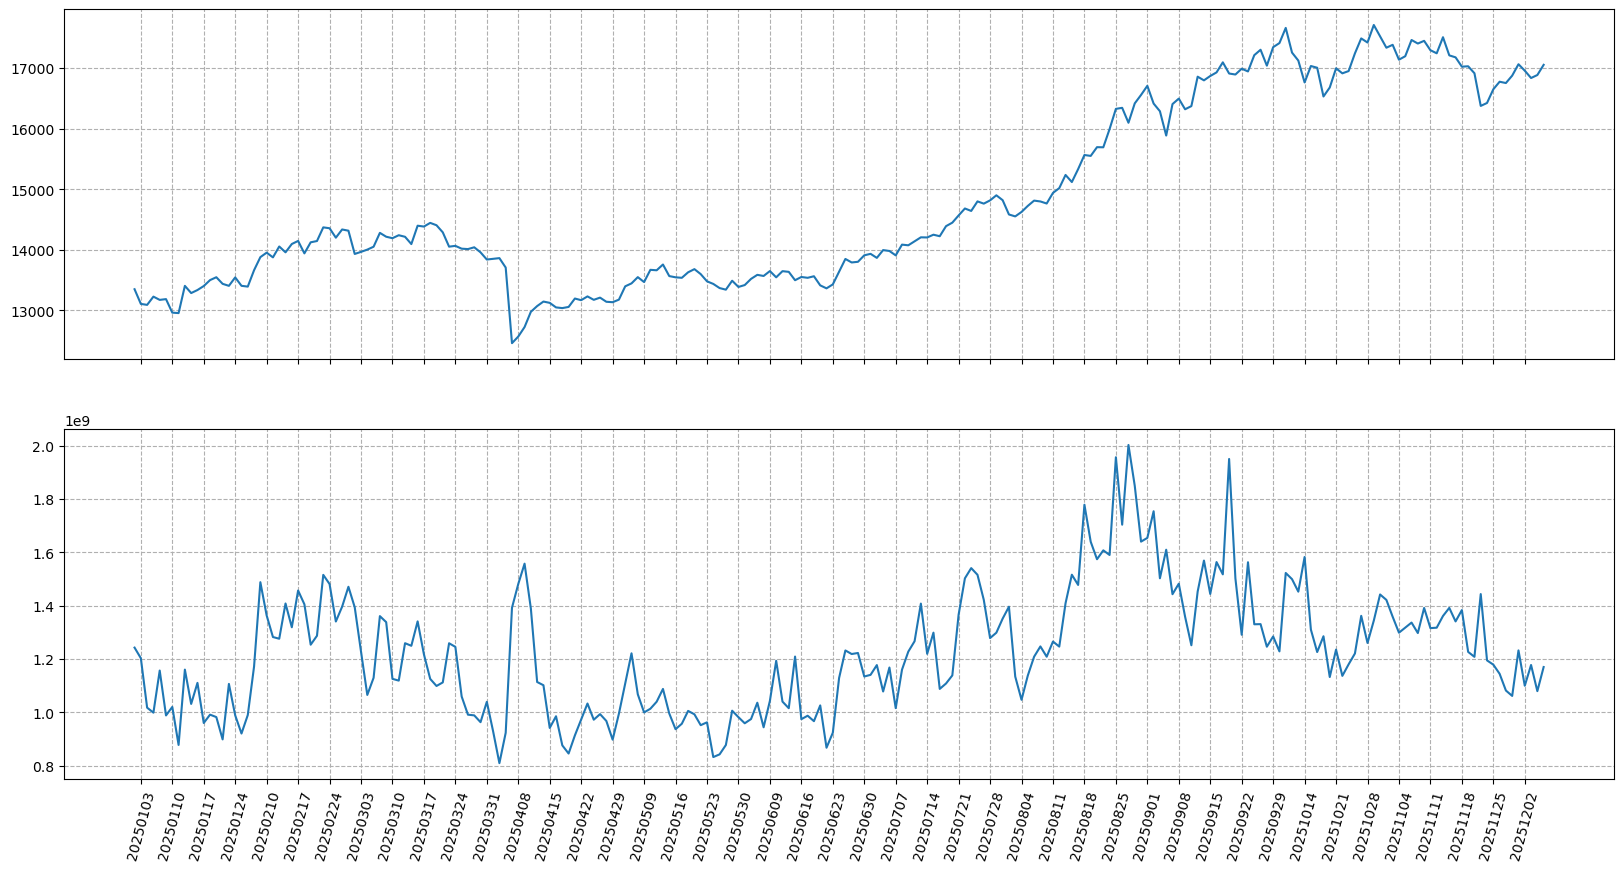

In [10]:
import matplotlib.pyplot as plt
import numpy as np

plt_data = total_mkt_data[(total_mkt_data.index >= "20240901")]# & (total_mkt_data.volume <= 1 * 1e9)]
t = np.arange(0.01, 5.0, 0.01)
t = plt_data.index
s1 = plt_data['close']
s2 = plt_data['volume']
s3 = plt_data['amount']
#s1 = np.sin(2 * np.pi * t)
#s2 = np.exp(-t)
#s3 = np.sin(4 * np.pi * t)
plt.figure(figsize=(20,10))
ax1 = plt.subplot(211)
plt.plot(t, s1)
plt.grid(ls='--')
plt.tick_params('x', labelbottom=False)

# share x only
ax2 = plt.subplot(212, sharex=ax1)
plt.plot(t, s2)
plt.grid(ls='--')
# make these tick labels invisible
plt.tick_params('x', labelbottom=10)

#ax3 = plt.subplot(313, sharex=ax1)
#plt.plot(t, s3)
#plt.grid(ls='--')
## make these tick labels invisible
#plt.tick_params('x', labelsize=10)
#
# share x and y
#ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
#plt.plot(t, s3)
#plt.xlim(0.01, 150.0)
plt.xticks(range(1, len(t), 5), rotation=75)
plt.show()

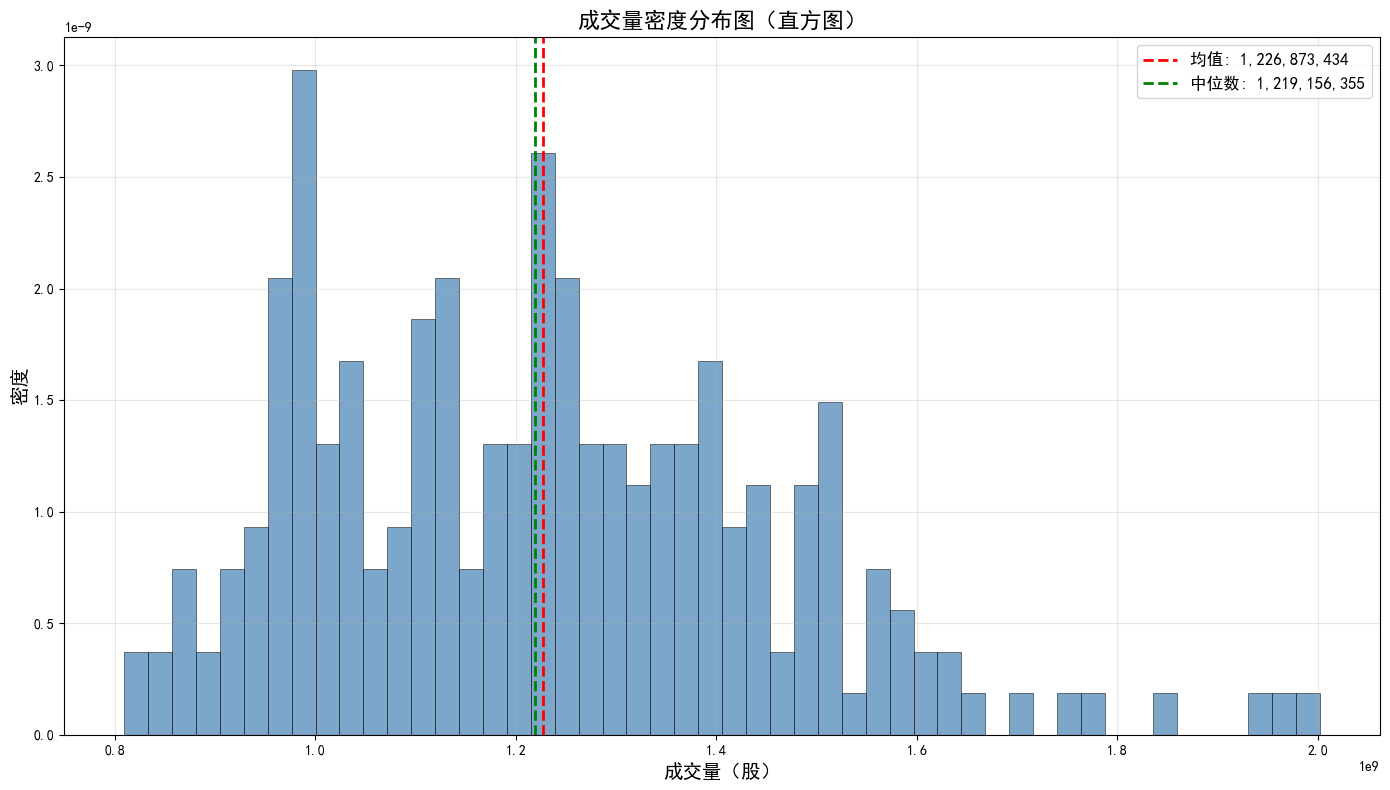

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd

volumes = plt_data['volume']  # 转换为实际成交量

plt.figure(figsize=(14, 8))

# 绘制直方图（密度形式）
plt.hist(volumes, bins=50, density=True, alpha=0.7, 
         color='steelblue', edgecolor='black', linewidth=0.5)

plt.title('成交量密度分布图（直方图）', fontsize=16, fontweight='bold')
plt.xlabel('成交量（股）', fontsize=14)
plt.ylabel('密度', fontsize=14)
plt.grid(True, alpha=0.3)

# 添加统计信息
mean_vol = np.mean(volumes)
median_vol = np.median(volumes)
std_vol = np.std(volumes)

plt.axvline(mean_vol, color='red', linestyle='--', linewidth=2, 
           label=f'均值: {mean_vol:,.0f}')
plt.axvline(median_vol, color='green', linestyle='--', linewidth=2,
           label=f'中位数: {median_vol:,.0f}')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

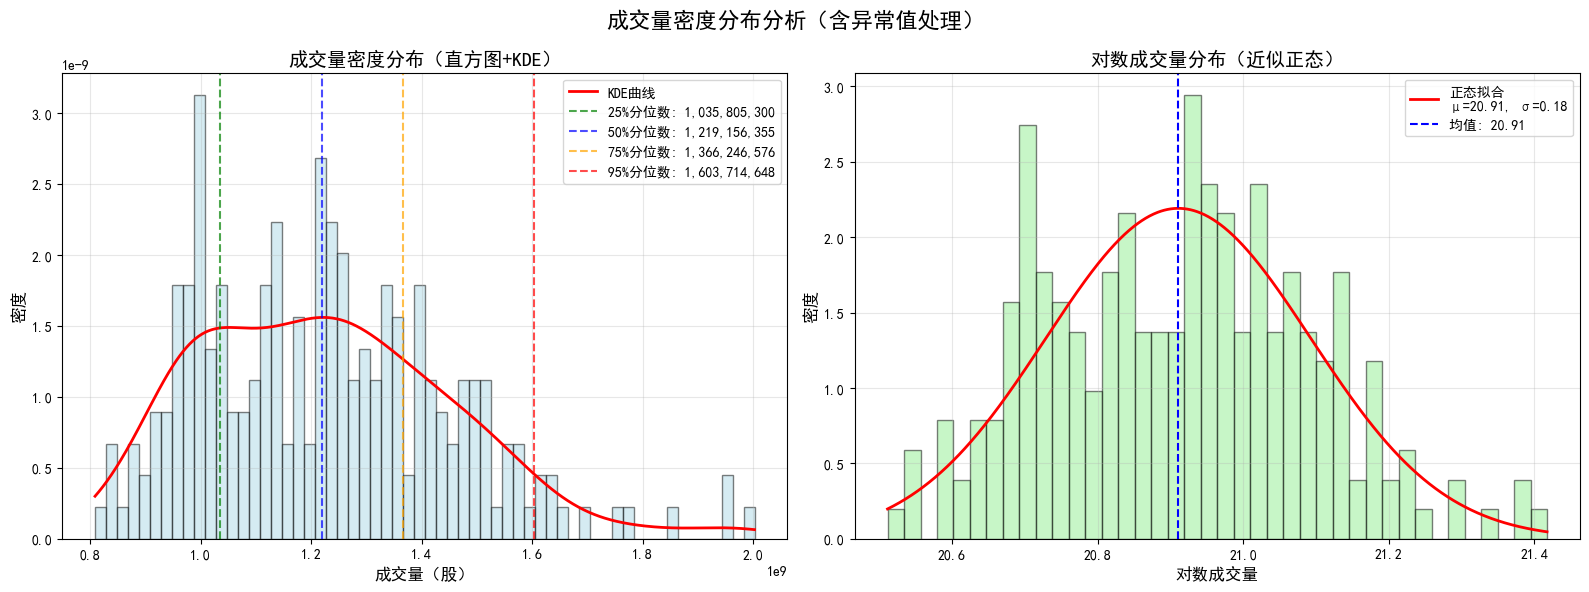

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd

volumes_with_outliers = plt_data['volume']  # 转换为实际成交量

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 左图：直方图+KDE（线性坐标）
ax1 = axes[0]
# 绘制直方图
n, bins, patches = ax1.hist(volumes_with_outliers, bins=60, density=True,
                           alpha=0.5, color='lightblue', edgecolor='black')

# 计算并绘制KDE
kde = gaussian_kde(volumes_with_outliers)
x_kde = np.linspace(volumes_with_outliers.min(), volumes_with_outliers.max(), 1000)
ax1.plot(x_kde, kde(x_kde), 'r-', linewidth=2, label='KDE曲线')

# 标记百分位数
percentiles = [25, 50, 75, 95]
percentile_values = np.percentile(volumes_with_outliers, percentiles)
colors = ['green', 'blue', 'orange', 'red']

for p_val, pct, color in zip(percentile_values, percentiles, colors):
    ax1.axvline(p_val, color=color, linestyle='--', linewidth=1.5,
               alpha=0.7, label=f'{pct}%分位数: {p_val:,.0f}')

ax1.set_title('成交量密度分布（直方图+KDE）', fontsize=14, fontweight='bold')
ax1.set_xlabel('成交量（股）', fontsize=12)
ax1.set_ylabel('密度', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# 右图：对数坐标下的分布
ax2 = axes[1]
log_volumes = np.log(volumes_with_outliers)

# 绘制直方图
n, bins, patches = ax2.hist(log_volumes, bins=40, density=True,
                           alpha=0.5, color='lightgreen', edgecolor='black')

# 绘制正态分布拟合曲线
from scipy.stats import norm
mu, std = norm.fit(log_volumes)
x = np.linspace(log_volumes.min(), log_volumes.max(), 1000)
p = norm.pdf(x, mu, std)
ax2.plot(x, p, 'r-', linewidth=2, label=f'正态拟合\nμ={mu:.2f}, σ={std:.2f}')

# 添加Q-Q图参考线
ax2.axvline(mu, color='blue', linestyle='--', linewidth=1.5, label=f'均值: {mu:.2f}')

ax2.set_title('对数成交量分布（近似正态）', fontsize=14, fontweight='bold')
ax2.set_xlabel('对数成交量', fontsize=12)
ax2.set_ylabel('密度', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.suptitle('成交量密度分布分析（含异常值处理）', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

(array([  1.,   0.,   0.,   0.,   2.,  11.,  52., 114.,  42.,   3.]),
 array([-0.09094607, -0.07838476, -0.06582346, -0.05326215, -0.04070084,
        -0.02813953, -0.01557822, -0.00301692,  0.00954439,  0.0221057 ,
         0.03466701]),
 <BarContainer object of 10 artists>)

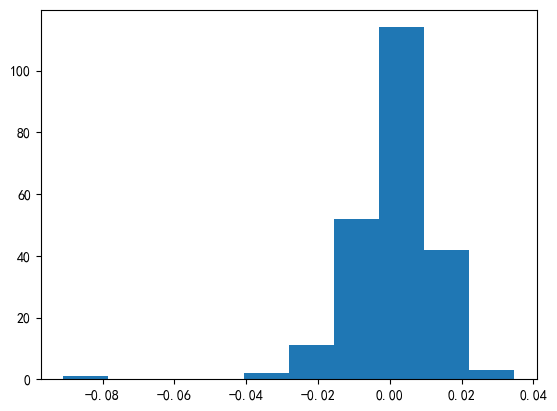

In [25]:
plt.hist(price_changes)

findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXGeneral'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXNonUnicode'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeOneSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeTwoSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeThreeSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFourSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['STIXSizeFiveSym'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmsy10'] not

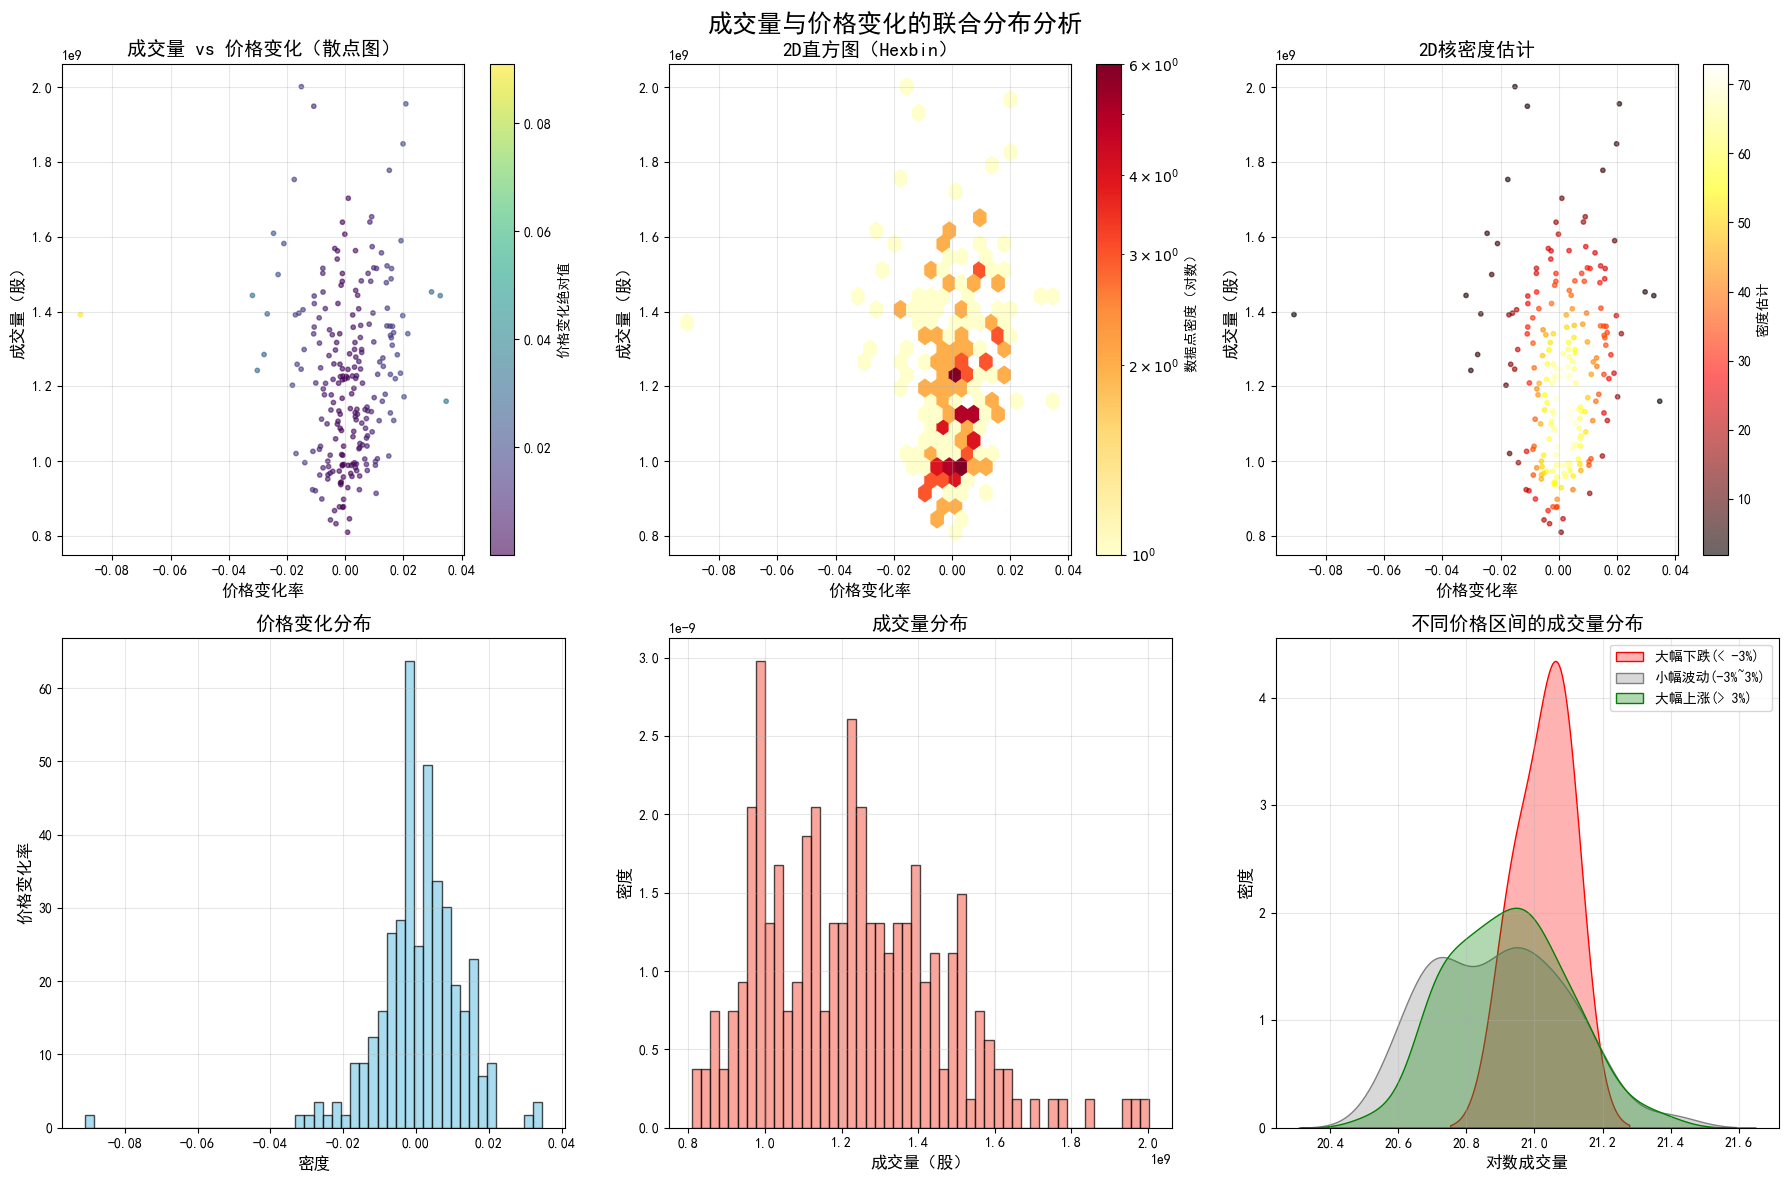

In [23]:
import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
from scipy.stats import gaussian_kde

# 生成成交量与价格变化数据
np.random.seed(42)
n_samples = 10000

# 价格变化（收益率）
price_changes = (plt_data['close'] / plt_data['preClose']) - 1  # 日均涨跌

# 成交量与价格变化正相关（放量上涨/下跌）
volumes = plt_data['volume']

# 创建图形
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 子图1：散点图
ax1 = axes[0, 0]
scatter = ax1.scatter(price_changes, volumes, c=np.abs(price_changes),
                     cmap='viridis', alpha=0.6, s=10)
ax1.set_title('成交量 vs 价格变化（散点图）', fontsize=14, fontweight='bold')
ax1.set_xlabel('价格变化率', fontsize=12)
ax1.set_ylabel('成交量（股）', fontsize=12)
ax1.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax1, label='价格变化绝对值')

# 子图2：2D直方图（hexbin）
ax2 = axes[0, 1]
hexbin = ax2.hexbin(price_changes, volumes, gridsize=30, cmap='YlOrRd', 
                   mincnt=1, bins='log')
ax2.set_title('2D直方图（Hexbin）', fontsize=14, fontweight='bold')
ax2.set_xlabel('价格变化率', fontsize=12)
ax2.set_ylabel('成交量（股）', fontsize=12)
ax2.grid(True, alpha=0.3)
plt.colorbar(hexbin, ax=ax2, label='数据点密度（对数）')

# 子图3：2D核密度估计
ax3 = axes[0, 2]
# 计算2D KDE
xy = np.vstack([price_changes, np.log(volumes)])
z = gaussian_kde(xy)(xy)

scatter_kde = ax3.scatter(price_changes, volumes, c=z, cmap='hot', 
                         alpha=0.6, s=10)
ax3.set_title('2D核密度估计', fontsize=14, fontweight='bold')
ax3.set_xlabel('价格变化率', fontsize=12)
ax3.set_ylabel('成交量（股）', fontsize=12)
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter_kde, ax=ax3, label='密度估计')

# 子图4：边际分布（价格变化）
ax4 = axes[1, 0]
ax4.hist(price_changes, bins=50, density=True, alpha=0.7, 
         color='skyblue', edgecolor='black', orientation='vertical')
ax4.set_title('价格变化分布', fontsize=14, fontweight='bold')
ax4.set_xlabel('密度', fontsize=12)
ax4.set_ylabel('价格变化率', fontsize=12)
ax4.grid(True, alpha=0.3)

# 子图5：边际分布（成交量）
ax5 = axes[1, 1]
ax5.hist(volumes, bins=50, density=True, alpha=0.7, 
         color='salmon', edgecolor='black', orientation='vertical')
ax5.set_title('成交量分布', fontsize=14, fontweight='bold')
ax5.set_xlabel('成交量（股）', fontsize=12)
ax5.set_ylabel('密度', fontsize=12)
ax5.grid(True, alpha=0.3)

# 子图6：条件分布（按价格变化分组）
ax6 = axes[1, 2]
# 将价格变化分为三组
price_bins = np.digitize(price_changes, [-0.03, 0, 0.03])
group_names = ['大幅下跌(< -3%)', '小幅波动(-3%~3%)', '大幅上涨(> 3%)']
colors = ['red', 'gray', 'green']

for i in range(3):
    group_volumes = volumes[price_bins == i]
    if len(group_volumes) > 0:
        sns.kdeplot(np.log(group_volumes), label=group_names[i], 
                   color=colors[i], ax=ax6, fill=True, alpha=0.3)

ax6.set_title('不同价格区间的成交量分布', fontsize=14, fontweight='bold')
ax6.set_xlabel('对数成交量', fontsize=12)
ax6.set_ylabel('密度', fontsize=12)
ax6.legend()
ax6.grid(True, alpha=0.3)

plt.suptitle('成交量与价格变化的联合分布分析', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

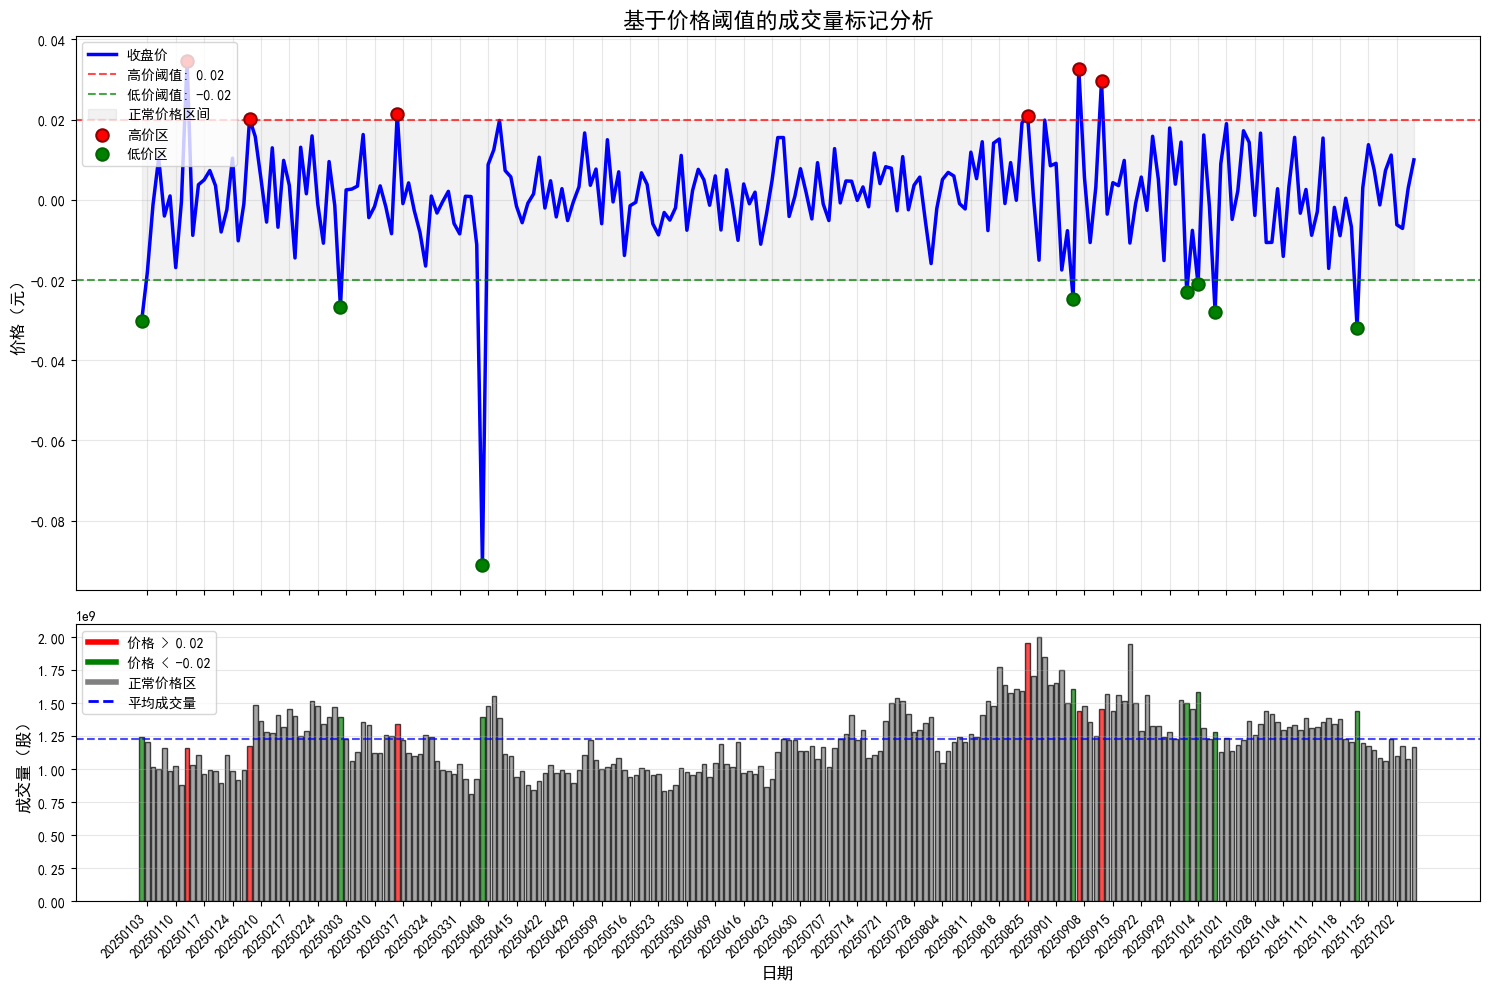

价格区间统计:
  高价区(>0.02)天数: 6
  低价区(<-0.02)天数: 8
  正常价格区天数: 211

成交量统计:
  高价区平均成交量: 1,420,723,406
  低价区平均成交量: 1,430,949,008
  正常价格区平均成交量: 1,213,623,650


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle

# 价格变化（收益率）
price_changes = (plt_data['close'] / plt_data['preClose']) - 1  # 日均涨跌
prices = price_changes.copy()
# 成交量与价格变化正相关（放量上涨/下跌）
volumes = plt_data['volume']

# 交易日期
dates = plt_data.index

# 设置价格阈值
price_threshold_low = -0.02  # 低价阈值
price_threshold_high = 0.02  # 高价阈值

# 创建图形
fig, axes = plt.subplots(2, 1, figsize=(15, 10), 
                        gridspec_kw={'height_ratios': [2, 1]},
                        sharex=True)

# 子图1：价格线图
ax1 = axes[0]
ax1.plot(dates, prices, 'b-', linewidth=2.5, label='收盘价')

# 标记价格区间
ax1.axhline(y=price_threshold_high, color='red', linestyle='--', 
           linewidth=1.5, alpha=0.7, label=f'高价阈值: {price_threshold_high}')
ax1.axhline(y=price_threshold_low, color='green', linestyle='--', 
           linewidth=1.5, alpha=0.7, label=f'低价阈值: {price_threshold_low}')

# 填充价格区间
ax1.fill_between(dates, price_threshold_low, price_threshold_high, 
                alpha=0.1, color='gray', label='正常价格区间')

# 标记高价区（价格>52）和低价区（价格<48）
high_price_dates = dates[prices > price_threshold_high]
high_price_values = prices[prices > price_threshold_high]
low_price_dates = dates[prices < price_threshold_low]
low_price_values = prices[prices < price_threshold_low]

ax1.scatter(high_price_dates, high_price_values, color='red', s=80, 
           edgecolors='darkred', linewidth=1.5, zorder=5, label='高价区')
ax1.scatter(low_price_dates, low_price_values, color='green', s=80, 
           edgecolors='darkgreen', linewidth=1.5, zorder=5, label='低价区')

ax1.set_ylabel('价格（元）', fontsize=12)
ax1.set_title('基于价格阈值的成交量标记分析', fontsize=16, fontweight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# 子图2：成交量柱状图（基于价格阈值标记）
ax2 = axes[1]
# 创建颜色数组（基于价格阈值）
colors = []
for price in prices:
    if price > price_threshold_high:
        colors.append('red')  # 高价区
    elif price < price_threshold_low:
        colors.append('green')  # 低价区
    else:
        colors.append('gray')  # 正常价格区

bars = ax2.bar(dates, volumes, color=colors, edgecolor='black', alpha=0.7)

# 添加平均成交量线
mean_volume = np.mean(volumes)
ax2.axhline(y=mean_volume, color='blue', linestyle='--', 
           linewidth=1.5, alpha=0.7, label=f'平均成交量: {mean_volume:,.0f}')

# 标记异常成交量（比如超过平均2倍）
for i, (date, vol) in enumerate(zip(dates, volumes)):
    if vol > mean_volume * 2:
        # 在柱子上方添加标记
        ax2.text(date, vol, '!', ha='center', va='bottom', 
                fontsize=12, fontweight='bold', color='red')

ax2.set_xlabel('日期', fontsize=12)
ax2.set_ylabel('成交量（股）', fontsize=12)
plt.xticks(range(1, len(dates), 5), rotation=75)

# 创建自定义图例
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', lw=4, label=f'价格 > {price_threshold_high}'),
    Line2D([0], [0], color='green', lw=4, label=f'价格 < {price_threshold_low}'),
    Line2D([0], [0], color='gray', lw=4, label='正常价格区'),
    Line2D([0], [0], color='blue', linestyle='--', lw=2, label=f'平均成交量')
]
ax2.legend(handles=legend_elements, loc='upper left')
ax2.grid(True, alpha=0.3, axis='y')

# 格式化x轴
fig.autofmt_xdate(rotation=45)

plt.tight_layout()
plt.show()

# 打印统计信息
print("=" * 50)
print("价格区间统计:")
print(f"  高价区(>{price_threshold_high})天数: {len(high_price_dates)}")
print(f"  低价区(<{price_threshold_low})天数: {len(low_price_dates)}")
print(f"  正常价格区天数: {len(dates) - len(high_price_dates) - len(low_price_dates)}")
print("\n成交量统计:")
print(f"  高价区平均成交量: {np.mean(volumes[prices > price_threshold_high]):,.0f}")
print(f"  低价区平均成交量: {np.mean(volumes[prices < price_threshold_low]):,.0f}")
print(f"  正常价格区平均成交量: {np.mean(volumes[(prices >= price_threshold_low) & (prices <= price_threshold_high)]):,.0f}")

AttributeError: 'Axes' object has no attribute 'xticks'

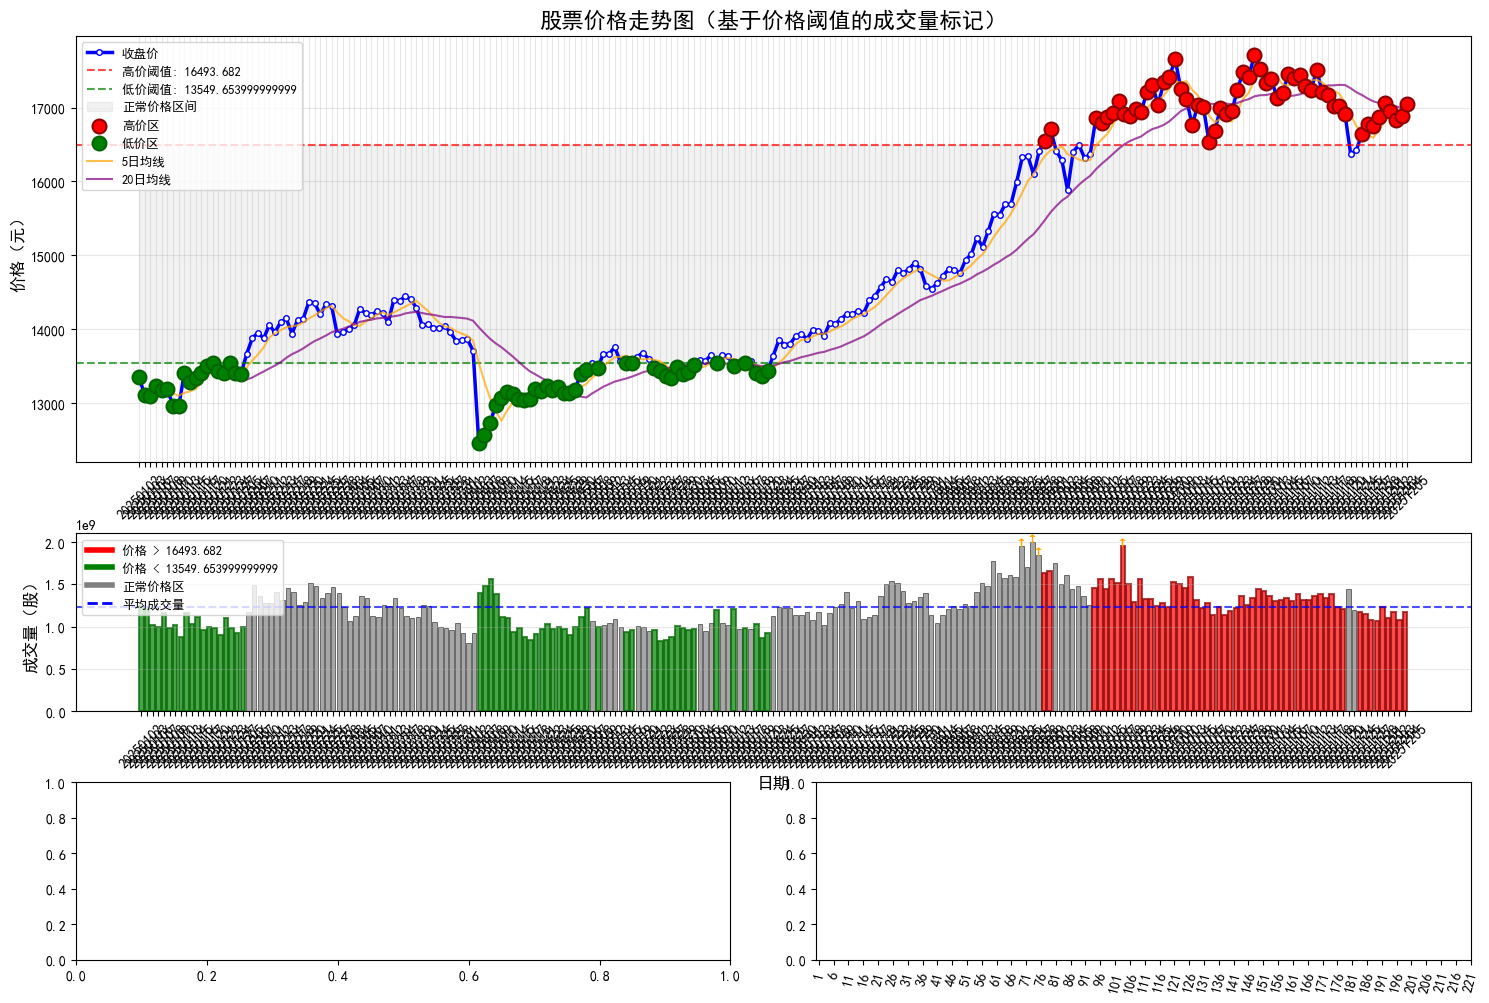

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# 价格
prices = plt_data['close']
# 成交量与价格变化正相关（放量上涨/下跌）
volumes = plt_data['volume']

# 交易日期
dates = plt_data.index

# 设置价格阈值
price_threshold_low = plt_data['close'].describe()['25%']  # 低价阈值
price_threshold_high = plt_data['close'].describe()['75%']  # 高价阈值

# 计算价格变动（涨跌幅）
price_changes_pct = (plt_data['close'] / plt_data['preClose']) - 1  # 日均涨跌

price_changes_pct[0] = 0  # 第一天无变化

# 计算价格变动值（绝对变化）
price_changes_abs = (plt_data['close'] - plt_data['preClose'])

price_changes_abs[0] = 0  # 第一天无变化

# 创建图形 - 使用GridSpec进行更精细的布局控制
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(4, 4, figure=fig, hspace=0.4, wspace=0.3)

# 子图1：价格线图（占2行4列）
ax1 = fig.add_subplot(gs[0:2, :])
# 子图2：成交量柱状图（占1行4列）
ax2 = fig.add_subplot(gs[2, :])
# 子图3：价格变动（涨跌幅）（占1行2列）
ax3 = fig.add_subplot(gs[3, 0:2])
# 子图4：价格变动值（绝对变化）（占1行2列）
ax4 = fig.add_subplot(gs[3, 2:4])

# ==================== 子图1：价格线图 ====================
ax1.plot(dates, prices, 'b-', linewidth=2.5, label='收盘价', marker='o', 
        markersize=4, markerfacecolor='white', markeredgecolor='blue')

# 标记价格区间
ax1.axhline(y=price_threshold_high, color='red', linestyle='--', 
           linewidth=1.5, alpha=0.7, label=f'高价阈值: {price_threshold_high}')
ax1.axhline(y=price_threshold_low, color='green', linestyle='--', 
           linewidth=1.5, alpha=0.7, label=f'低价阈值: {price_threshold_low}')

# 填充价格区间
ax1.fill_between(dates, price_threshold_low, price_threshold_high, 
                alpha=0.1, color='gray', label='正常价格区间')

# 标记高价区和低价区
high_price_dates = dates[prices > price_threshold_high]
high_price_values = prices[prices > price_threshold_high]
low_price_dates = dates[prices < price_threshold_low]
low_price_values = prices[prices < price_threshold_low]

ax1.scatter(high_price_dates, high_price_values, color='red', s=100, 
           edgecolors='darkred', linewidth=1.5, zorder=5, label='高价区')
ax1.scatter(low_price_dates, low_price_values, color='green', s=100, 
           edgecolors='darkgreen', linewidth=1.5, zorder=5, label='低价区')

# 添加移动平均线
ma_short = pd.Series(prices).rolling(window=5).mean()
ma_long = pd.Series(prices).rolling(window=20).mean()
ax1.plot(dates, ma_short, 'orange', linewidth=1.5, alpha=0.7, label='5日均线')
ax1.plot(dates, ma_long, 'purple', linewidth=1.5, alpha=0.7, label='20日均线')

ax1.set_ylabel('价格（元）', fontsize=12)
ax1.set_title('股票价格走势图（基于价格阈值的成交量标记）', fontsize=16, fontweight='bold')
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)
ax1.set_x(range(1, len(dates), 5), rotation=75)
# ==================== 子图2：成交量柱状图 ====================
# 创建颜色数组（基于价格阈值）
bar_colors = []
bar_edgecolors = []
bar_linewidths = []

for price, volume in zip(prices, volumes):
    if price > price_threshold_high:
        bar_colors.append('red')  # 高价区 - 红色
        bar_edgecolors.append('darkred')
        bar_linewidths.append(1.5)
    elif price < price_threshold_low:
        bar_colors.append('green')  # 低价区 - 绿色
        bar_edgecolors.append('darkgreen')
        bar_linewidths.append(1.5)
    else:
        bar_colors.append('gray')  # 正常价格区 - 灰色
        bar_edgecolors.append('black')
        bar_linewidths.append(0.5)

bars = ax2.bar(dates, volumes, color=bar_colors, edgecolor=bar_edgecolors, 
              alpha=0.7, linewidth=bar_linewidths)

# 添加平均成交量线
mean_volume = np.mean(volumes)
ax2.axhline(y=mean_volume, color='blue', linestyle='--', 
           linewidth=1.5, alpha=0.7, label=f'平均成交量: {mean_volume:,.0f}')

# 标记异常高成交量（超过平均2倍）
for i, (date, vol) in enumerate(zip(dates, volumes)):
    if vol > mean_volume * 2:
        # 在柱子上方添加标记
        ax2.text(date, vol, '🔥', ha='center', va='bottom', 
                fontsize=10, fontweight='bold', color='red')
    elif vol > mean_volume * 1.5:
        # 标记较高成交量
        ax2.text(date, vol, '↑', ha='center', va='bottom', 
                fontsize=8, fontweight='bold', color='orange')

ax2.set_xlabel('日期', fontsize=12)
ax2.set_ylabel('成交量（股）', fontsize=12)

# 创建自定义图例
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', lw=4, label=f'价格 > {price_threshold_high}'),
    Line2D([0], [0], color='green', lw=4, label=f'价格 < {price_threshold_low}'),
    Line2D([0], [0], color='gray', lw=4, label='正常价格区'),
    Line2D([0], [0], color='blue', linestyle='--', lw=2, label=f'平均成交量')
]
ax2.legend(handles=legend_elements, loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')
ax2.tick_params(axis='x', rotation=45)
ax2.xticks(range(1, len(dates), 5), rotation=75)
# ==================== 子图3：价格变动百分比 ====================
# 创建颜色数组（涨跌颜色）
change_colors_pct = ['red' if change >= 0 else 'green' for change in price_changes_pct]

bars_pct = ax3.bar(dates, price_changes_pct, color=change_colors_pct, 
                  edgecolor='black', alpha=0.7, width=0.8)

# 标记显著涨跌
for i, (date, change) in enumerate(zip(dates, price_changes_pct)):
    if abs(change) > 3:  # 涨跌幅超过3%
        # 添加标注
        ax3.text(date, change, f'{change:.1f}%', 
                ha='center', va='bottom' if change >= 0 else 'top',
                fontsize=8, fontweight='bold')

# 添加零线
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# 添加阈值线
ax3.axhline(y=2, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='+2%')
ax3.axhline(y=-2, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='-2%')

ax3.set_xlabel('日期', fontsize=10)
ax3.set_ylabel('价格变动 (%)', fontsize=10)
ax3.set_title('价格涨跌幅（百分比）', fontsize=12, fontweight='bold')
ax3.legend(loc='upper left', fontsize=8)
ax3.grid(True, alpha=0.3, axis='y')
ax3.tick_params(axis='x', rotation=45)
ax3.xticks(range(1, len(dates), 5), rotation=75)
# 添加统计信息
mean_change_pct = np.mean(price_changes_pct[1:])  # 排除第一天
positive_days = np.sum(price_changes_pct[1:] > 0)
negative_days = np.sum(price_changes_pct[1:] < 0)
ax3.text(0.02, 0.98, f'平均日涨跌: {mean_change_pct:.2f}%\n上涨天数: {positive_days}\n下跌天数: {negative_days}',
         transform=ax3.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ==================== 子图4：价格变动绝对值 ====================
# 创建颜色数组（涨跌颜色）
change_colors_abs = ['red' if change >= 0 else 'green' for change in price_changes_abs]

bars_abs = ax4.bar(dates, price_changes_abs, color=change_colors_abs, 
                  edgecolor='black', alpha=0.7, width=0.8)

# 标记显著变动
for i, (date, change) in enumerate(zip(dates, price_changes_abs)):
    if abs(change) > 1.5:  # 变动超过1.5元
        # 添加标注
        ax4.text(date, change, f'{change:.1f}', 
                ha='center', va='bottom' if change >= 0 else 'top',
                fontsize=8, fontweight='bold')

# 添加零线
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# 添加阈值线
ax4.axhline(y=1, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='+1元')
ax4.axhline(y=-1, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='-1元')

ax4.set_xlabel('日期', fontsize=10)
ax4.set_ylabel('价格变动 (元)', fontsize=10)
ax4.set_title('价格变动值（绝对变化）', fontsize=12, fontweight='bold')
ax4.legend(loc='upper left', fontsize=8)
ax4.grid(True, alpha=0.3, axis='y')
ax4.tick_params(axis='x', rotation=45)
ax4.xticks(range(1, len(dates), 5), rotation=75)
# 添加统计信息
mean_change_abs = np.mean(price_changes_abs[1:])  # 排除第一天
max_change_abs = np.max(np.abs(price_changes_abs[1:]))
ax4.text(0.02, 0.98, f'平均日变动: {mean_change_abs:.2f}元\n最大变动: {max_change_abs:.2f}元',
         transform=ax4.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

#plt.xticks(range(1, len(dates), 5), rotation=75)
plt.suptitle('股票价格与成交量综合分析（含价格变动子图）', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# ==================== 打印详细统计信息 ====================
print("=" * 70)
print("股票价格与成交量综合分析报告")
print("=" * 70)
print(f"分析期间: {dates[0].strftime('%Y-%m-%d')} 至 {dates[-1].strftime('%Y-%m-%d')}")
print(f"总交易日数: {len(dates)} 天")
print("\n" + "=" * 70)
print("价格区间分析:")
print("=" * 70)
print(f"  高价区(>{price_threshold_high})天数: {len(high_price_dates)}")
print(f"  低价区(<{price_threshold_low})天数: {len(low_price_dates)}")
print(f"  正常价格区天数: {len(dates) - len(high_price_dates) - len(low_price_dates)}")

print("\n" + "=" * 70)
print("成交量统计:")
print("=" * 70)
print(f"  平均成交量: {np.mean(volumes):,.0f}")
print(f"  最大成交量: {np.max(volumes):,.0f}")
print(f"  最小成交量: {np.min(volumes):,.0f}")
print(f"  成交量标准差: {np.std(volumes):,.0f}")

print("\n" + "-" * 35)
print("按价格区间的成交量分析:")
print("-" * 35)
if len(high_price_dates) > 0:
    high_vol_mean = np.mean(volumes[prices > price_threshold_high])
    print(f"  高价区平均成交量: {high_vol_mean:,.0f}")
else:
    print(f"  高价区平均成交量: 无数据")

if len(low_price_dates) > 0:
    low_vol_mean = np.mean(volumes[prices < price_threshold_low])
    print(f"  低价区平均成交量: {low_vol_mean:,.0f}")
else:
    print(f"  低价区平均成交量: 无数据")

normal_mask = (prices >= price_threshold_low) & (prices <= price_threshold_high)
normal_vol_mean = np.mean(volumes[normal_mask])
print(f"  正常价格区平均成交量: {normal_vol_mean:,.0f}")

print("\n" + "=" * 70)
print("价格变动分析:")
print("=" * 70)
print(f"  平均日涨跌幅: {mean_change_pct:.2f}%")
print(f"  最大单日涨幅: {np.max(price_changes_pct):.2f}%")
print(f"  最大单日跌幅: {np.min(price_changes_pct):.2f}%")
print(f"  上涨天数: {positive_days} ({positive_days/(len(dates)-1)*100:.1f}%)")
print(f"  下跌天数: {negative_days} ({negative_days/(len(dates)-1)*100:.1f}%)")
print(f"  平盘天数: {len(dates) - positive_days - negative_days - 1}")

print("\n" + "-" * 35)
print("价格变动绝对值分析:")
print("-" * 35)
print(f"  平均日变动值: {mean_change_abs:.2f}元")
print(f"  最大上涨值: {np.max(price_changes_abs):.2f}元")
print(f"  最大下跌值: {np.min(price_changes_abs):.2f}元")
print(f"  平均绝对变动值: {np.mean(np.abs(price_changes_abs[1:])):.2f}元")

print("\n" + "=" * 70)
print("量价关系分析:")
print("=" * 70)
# 计算价格与成交量的相关性
price_vol_corr = np.corrcoef(prices, volumes)[0, 1]
print(f"  价格与成交量相关系数: {price_vol_corr:.3f}")

# 计算价格变动与成交量的相关性
change_vol_corr = np.corrcoef(np.abs(price_changes_pct[1:]), volumes[1:])[0, 1]
print(f"  价格波动与成交量相关系数: {change_vol_corr:.3f}")

# 分析不同价格区间的价格变动特征
if len(high_price_dates) > 0:
    high_price_changes = price_changes_pct[prices > price_threshold_high]
    print(f"\n  高价区价格变动特征:")
    print(f"    平均涨跌幅: {np.mean(high_price_changes):.2f}%")
    print(f"    上涨比例: {np.sum(high_price_changes > 0)/len(high_price_changes)*100:.1f}%")

if len(low_price_dates) > 0:
    low_price_changes = price_changes_pct[prices < price_threshold_low]
    print(f"\n  低价区价格变动特征:")
    print(f"    平均涨跌幅: {np.mean(low_price_changes):.2f}%")
    print(f"    上涨比例: {np.sum(low_price_changes > 0)/len(low_price_changes)*100:.1f}%")

print("\n" + "=" * 70)
print("分析结论:")
print("=" * 70)
if price_vol_corr > 0.3:
    print("  1. 价格与成交量呈现正相关，价涨量增特征明显")
elif price_vol_corr < -0.3:
    print("  1. 价格与成交量呈现负相关，价跌量增特征明显")
else:
    print("  1. 价格与成交量相关性不明显")

if change_vol_corr > 0.3:
    print("  2. 价格波动与成交量正相关，波动越大成交量越高")
else:
    print("  2. 价格波动与成交量相关性不显著")

if len(high_price_dates) > 0 and len(low_price_dates) > 0:
    if high_vol_mean > low_vol_mean:
        print("  3. 高价区成交量高于低价区，可能显示追高情绪")
    else:
        print("  3. 低价区成交量高于高价区，可能显示抄底情绪")

if positive_days > negative_days:
    print(f"  4. 总体上涨趋势明显，上涨天数占比{positive_days/(len(dates)-1)*100:.1f}%")
else:
    print(f"  4. 总体下跌趋势或震荡，下跌天数占比{negative_days/(len(dates)-1)*100:.1f}%")

print("\n" + "=" * 70)

In [41]:
plt_data['close'].describe()['75%']

16493.682

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec
import warnings
warnings.filterwarnings('ignore')

# 价格
prices = plt_data['close']
# 成交量与价格变化正相关（放量上涨/下跌）
volumes = plt_data['volume']

# 交易日期
dates = plt_data.index

# 设置价格阈值
price_threshold_low = plt_data['close'].describe()['25%']  # 低价阈值
price_threshold_high = plt_data['close'].describe()['75%']  # 高价阈值

# 计算价格变动（涨跌幅）
price_changes_pct = ((plt_data['close'] / plt_data['preClose']) - 1) * 100  # 日均涨跌

price_changes_pct[0] = 0  # 第一天无变化

# 计算价格变动值（绝对变化）
price_changes_abs = (plt_data['close'] - plt_data['preClose'])

price_changes_abs[0] = 0  # 第一天无变化

# 创建图形 - 使用GridSpec进行更精细的布局控制
fig = plt.figure(figsize=(24, 16))
gs = GridSpec(6, 4, figure=fig, hspace=0.6, wspace=0.3)

# 子图1：价格线图（占2行4列）
ax1 = fig.add_subplot(gs[0:2, :])
# 子图2：成交量柱状图（占1行4列）
ax2 = fig.add_subplot(gs[2:3, :])
# 子图3：价格变动（涨跌幅）（占1行2列）
ax3 = fig.add_subplot(gs[3:5, :])
# 子图4：价格变动值（绝对变化）（占1行2列）
ax4 = fig.add_subplot(gs[5, :])

# ==================== 子图1：价格线图 ====================
ax1.plot(dates, prices, 'b-', linewidth=2.5, label='收盘价', marker='o', 
        markersize=4, markerfacecolor='white', markeredgecolor='blue')

# 标记价格区间
ax1.axhline(y=price_threshold_high, color='red', linestyle='--', 
           linewidth=1.5, alpha=0.7, label=f'高价阈值: {price_threshold_high}')
ax1.axhline(y=price_threshold_low, color='green', linestyle='--', 
           linewidth=1.5, alpha=0.7, label=f'低价阈值: {price_threshold_low}')

# 填充价格区间
ax1.fill_between(dates, price_threshold_low, price_threshold_high, 
                alpha=0.1, color='gray', label='正常价格区间')

# 标记高价区和低价区
high_price_dates = dates[prices > price_threshold_high]
high_price_values = prices[prices > price_threshold_high]
low_price_dates = dates[prices < price_threshold_low]
low_price_values = prices[prices < price_threshold_low]

ax1.scatter(high_price_dates, high_price_values, color='red', s=100, 
           edgecolors='darkred', linewidth=1.5, zorder=5, label='高价区')
ax1.scatter(low_price_dates, low_price_values, color='green', s=100, 
           edgecolors='darkgreen', linewidth=1.5, zorder=5, label='低价区')

# 添加移动平均线
ma_short = pd.Series(prices).rolling(window=5).mean()
ma_long = pd.Series(prices).rolling(window=20).mean()
ax1.plot(dates, ma_short, 'orange', linewidth=1.5, alpha=0.7, label='5日均线')
ax1.plot(dates, ma_long, 'purple', linewidth=1.5, alpha=0.7, label='20日均线')

ax1.set_ylabel('价格（元）', fontsize=12)
ax1.set_title('股票价格走势图（基于价格阈值的成交量标记）', fontsize=16, fontweight='bold')
ax1.legend(loc='upper left', fontsize=9)
ax1.grid(True, alpha=0.3)

# ==================== 设置ax1的x轴刻度 ====================
# 每隔5天显示一个刻度
tick_indices = range(0, len(dates), 5)  # 从0开始，每隔5个
tick_dates = dates[tick_indices]
tick_labels = [date for date in tick_dates]

ax1.set_xticks(tick_dates)
ax1.set_xticklabels(tick_labels, rotation=75, fontsize=9)

# ==================== 子图2：成交量柱状图 ====================
# 创建颜色数组（基于价格阈值）
bar_colors = []
bar_edgecolors = []
bar_linewidths = []

for price, volume in zip(prices, volumes):
    if price > price_threshold_high:
        bar_colors.append('red')  # 高价区 - 红色
        bar_edgecolors.append('darkred')
        bar_linewidths.append(1.5)
    elif price < price_threshold_low:
        bar_colors.append('green')  # 低价区 - 绿色
        bar_edgecolors.append('darkgreen')
        bar_linewidths.append(1.5)
    else:
        bar_colors.append('gray')  # 正常价格区 - 灰色
        bar_edgecolors.append('black')
        bar_linewidths.append(0.5)

bars = ax2.bar(dates, volumes, color=bar_colors, edgecolor=bar_edgecolors, 
              alpha=0.7, linewidth=bar_linewidths)

# 添加平均成交量线
mean_volume = np.mean(volumes)
ax2.axhline(y=mean_volume, color='blue', linestyle='--', 
           linewidth=1.5, alpha=0.7, label=f'平均成交量: {mean_volume:,.0f}')

# 标记异常高成交量（超过平均2倍）
for i, (date, vol) in enumerate(zip(dates, volumes)):
    if vol > mean_volume * 2:
        # 在柱子上方添加标记
        ax2.text(date, vol, '🔥', ha='center', va='bottom', 
                fontsize=10, fontweight='bold', color='red')
    elif vol > mean_volume * 1.5:
        # 标记较高成交量
        ax2.text(date, vol, '↑', ha='center', va='bottom', 
                fontsize=8, fontweight='bold', color='orange')

ax2.set_xlabel('日期', fontsize=12)
ax2.set_ylabel('成交量（股）', fontsize=12)

# 创建自定义图例
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='red', lw=4, label=f'价格 > {price_threshold_high}'),
    Line2D([0], [0], color='green', lw=4, label=f'价格 < {price_threshold_low}'),
    Line2D([0], [0], color='gray', lw=4, label='正常价格区'),
    Line2D([0], [0], color='blue', linestyle='--', lw=2, label=f'平均成交量')
]
ax2.legend(handles=legend_elements, loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3, axis='y')

# ==================== 设置ax2的x轴刻度 ====================
ax2.set_xticks(tick_dates)
ax2.set_xticklabels(tick_labels, rotation=75, fontsize=9)

# ==================== 子图3：价格变动百分比 ====================
# 创建颜色数组（涨跌颜色）
change_colors_pct = ['red' if change >= 0 else 'green' for change in price_changes_pct]

bars_pct = ax3.bar(dates, price_changes_pct, color=change_colors_pct, 
                  edgecolor='black', alpha=0.7, width=0.8)

# 标记显著涨跌
for i, (date, change) in enumerate(zip(dates, price_changes_pct)):
    if abs(change) > 3:  # 涨跌幅超过3%
        # 添加标注
        ax3.text(date, change, f'{change:.1f}%', 
                ha='center', va='bottom' if change >= 0 else 'top',
                fontsize=8, fontweight='bold')

# 添加零线
ax3.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# 添加阈值线
ax3.axhline(y=2, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='+2%')
ax3.axhline(y=-2, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='-2%')

ax3.set_xlabel('日期', fontsize=10)
ax3.set_ylabel('价格变动 (%)', fontsize=10)
ax3.set_title('价格涨跌幅（百分比）', fontsize=12, fontweight='bold')
ax3.legend(loc='upper left', fontsize=8)
ax3.grid(True, alpha=0.3, axis='y')

# 添加统计信息
mean_change_pct = np.mean(price_changes_pct[1:])  # 排除第一天
positive_days = np.sum(price_changes_pct[1:] > 0)
negative_days = np.sum(price_changes_pct[1:] < 0)
ax3.text(0.02, 0.98, f'平均日涨跌: {mean_change_pct:.2f}%\n上涨天数: {positive_days}\n下跌天数: {negative_days}',
         transform=ax3.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ==================== 设置ax3的x轴刻度 ====================
ax3.set_xticks(tick_dates)
ax3.set_xticklabels(tick_labels, rotation=75, fontsize=9)

# ==================== 子图4：价格变动绝对值 ====================
# 创建颜色数组（涨跌颜色）
change_colors_abs = ['red' if change >= 0 else 'green' for change in price_changes_abs]

bars_abs = ax4.bar(dates, price_changes_abs, color=change_colors_abs, 
                  edgecolor='black', alpha=0.7, width=0.8)

# 标记显著变动
for i, (date, change) in enumerate(zip(dates, price_changes_abs)):
    if abs(change) > 1.5:  # 变动超过1.5元
        # 添加标注
        ax4.text(date, change, f'{change:.1f}', 
                ha='center', va='bottom' if change >= 0 else 'top',
                fontsize=8, fontweight='bold')

# 添加零线
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1, alpha=0.5)

# 添加阈值线
ax4.axhline(y=1, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='+1元')
ax4.axhline(y=-1, color='orange', linestyle='--', linewidth=1, alpha=0.5, label='-1元')

ax4.set_xlabel('日期', fontsize=10)
ax4.set_ylabel('价格变动 (元)', fontsize=10)
ax4.set_title('价格变动值（绝对变化）', fontsize=12, fontweight='bold')
ax4.legend(loc='upper left', fontsize=8)
ax4.grid(True, alpha=0.3, axis='y')

# 添加统计信息
mean_change_abs = np.mean(price_changes_abs[1:])  # 排除第一天
max_change_abs = np.max(np.abs(price_changes_abs[1:]))
ax4.text(0.02, 0.98, f'平均日变动: {mean_change_abs:.2f}元\n最大变动: {max_change_abs:.2f}元',
         transform=ax4.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))

# ==================== 设置ax4的x轴刻度 ====================
ax4.set_xticks(tick_dates)
ax4.set_xticklabels(tick_labels, rotation=75, fontsize=9)

plt.suptitle('股票价格与成交量综合分析（含价格变动子图）', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# ==================== 打印详细统计信息 ====================
print("=" * 70)
print("股票价格与成交量综合分析报告")
print("=" * 70)
print(f"分析期间: {dates[0]} 至 {dates[-1]}")
print(f"总交易日数: {len(dates)} 天")
print("\n" + "=" * 70)
print("价格区间分析:")
print("=" * 70)
print(f"  高价区(>{price_threshold_high})天数: {len(high_price_dates)}")
print(f"  低价区(<{price_threshold_low})天数: {len(low_price_dates)}")
print(f"  正常价格区天数: {len(dates) - len(high_price_dates) - len(low_price_dates)}")

print("\n" + "=" * 70)
print("成交量统计:")
print("=" * 70)
print(f"  平均成交量: {np.mean(volumes):,.0f}")
print(f"  最大成交量: {np.max(volumes):,.0f}")
print(f"  最小成交量: {np.min(volumes):,.0f}")
print(f"  成交量标准差: {np.std(volumes):,.0f}")

print("\n" + "-" * 35)
print("按价格区间的成交量分析:")
print("-" * 35)
if len(high_price_dates) > 0:
    high_vol_mean = np.mean(volumes[prices > price_threshold_high])
    print(f"  高价区平均成交量: {high_vol_mean:,.0f}")
else:
    print(f"  高价区平均成交量: 无数据")

if len(low_price_dates) > 0:
    low_vol_mean = np.mean(volumes[prices < price_threshold_low])
    print(f"  低价区平均成交量: {low_vol_mean:,.0f}")
else:
    print(f"  低价区平均成交量: 无数据")

normal_mask = (prices >= price_threshold_low) & (prices <= price_threshold_high)
normal_vol_mean = np.mean(volumes[normal_mask])
print(f"  正常价格区平均成交量: {normal_vol_mean:,.0f}")

print("\n" + "=" * 70)
print("价格变动分析:")
print("=" * 70)
print(f"  平均日涨跌幅: {mean_change_pct:.2f}%")
print(f"  最大单日涨幅: {np.max(price_changes_pct):.2f}%")
print(f"  最大单日跌幅: {np.min(price_changes_pct):.2f}%")
print(f"  上涨天数: {positive_days} ({positive_days/(len(dates)-1)*100:.1f}%)")
print(f"  下跌天数: {negative_days} ({negative_days/(len(dates)-1)*100:.1f}%)")
print(f"  平盘天数: {len(dates) - positive_days - negative_days - 1}")

print("\n" + "-" * 35)
print("价格变动绝对值分析:")
print("-" * 35)
print(f"  平均日变动值: {mean_change_abs:.2f}元")
print(f"  最大上涨值: {np.max(price_changes_abs):.2f}元")
print(f"  最大下跌值: {np.min(price_changes_abs):.2f}元")
print(f"  平均绝对变动值: {np.mean(np.abs(price_changes_abs[1:])):.2f}元")

print("\n" + "=" * 70)
print("量价关系分析:")
print("=" * 70)
# 计算价格与成交量的相关性
price_vol_corr = np.corrcoef(prices, volumes)[0, 1]
print(f"  价格与成交量相关系数: {price_vol_corr:.3f}")

# 计算价格变动与成交量的相关性
change_vol_corr = np.corrcoef(np.abs(price_changes_pct[1:]), volumes[1:])[0, 1]
print(f"  价格波动与成交量相关系数: {change_vol_corr:.3f}")

# 分析不同价格区间的价格变动特征
if len(high_price_dates) > 0:
    high_price_changes = price_changes_pct[prices > price_threshold_high]
    print(f"\n  高价区价格变动特征:")
    print(f"    平均涨跌幅: {np.mean(high_price_changes):.2f}%")
    print(f"    上涨比例: {np.sum(high_price_changes > 0)/len(high_price_changes)*100:.1f}%")

if len(low_price_dates) > 0:
    low_price_changes = price_changes_pct[prices < price_threshold_low]
    print(f"\n  低价区价格变动特征:")
    print(f"    平均涨跌幅: {np.mean(low_price_changes):.2f}%")
    print(f"    上涨比例: {np.sum(low_price_changes > 0)/len(low_price_changes)*100:.1f}%")

print("\n" + "=" * 70)
print("分析结论:")
print("=" * 70)
if price_vol_corr > 0.3:
    print("  1. 价格与成交量呈现正相关，价涨量增特征明显")
elif price_vol_corr < -0.3:
    print("  1. 价格与成交量呈现负相关，价跌量增特征明显")
else:
    print("  1. 价格与成交量相关性不明显")

if change_vol_corr > 0.3:
    print("  2. 价格波动与成交量正相关，波动越大成交量越高")
else:
    print("  2. 价格波动与成交量相关性不显著")

if len(high_price_dates) > 0 and len(low_price_dates) > 0:
    if high_vol_mean > low_vol_mean:
        print("  3. 高价区成交量高于低价区，可能显示追高情绪")
    else:
        print("  3. 低价区成交量高于高价区，可能显示抄底情绪")

if positive_days > negative_days:
    print(f"  4. 总体上涨趋势明显，上涨天数占比{positive_days/(len(dates)-1)*100:.1f}%")
else:
    print(f"  4. 总体下跌趋势或震荡，下跌天数占比{negative_days/(len(dates)-1)*100:.1f}%")

print("\n" + "=" * 70)

In [ ]:
get_hist_data_by_count('601318', 10)